<a href="https://colab.research.google.com/github/nmermigas/PyTorch/blob/main/03_pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Computer Vision

## 0. Computer vision libraries:

* [`torchvision`](https://pytorch.org/vision/stable/index.html#torchvision)
* `torchvision.datasets` - get datasets and data loading functions for computer vision here
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transforms` - functions for manipulating the vision data to be suitable for use with ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch
* `torch.utils.data.DataLoader` - Creates a Python iterable for datasets

In [1]:
# import PyTorch
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor


import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)


2.1.0+cu118
0.16.0+cu118


## 1. Getting a dataset

Dataset: FashionMNIST ([`FashionMNIST`](https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST))

In [2]:
# Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(root='data',# where to download data to?
                                      train=True, # do we want the training dataset?
                                      download=True, # do we want to download yes/no
                                      transform=ToTensor(), # how do we want to transform the data
                                      target_transform=None # how do we want to transform the labels/targets
)

test_data = datasets.FashionMNIST(root='data',
                      train=False,
                      download=True,
                      transform=ToTensor(),
                      target_transform=None)

100%|██████████| 26421880/26421880 [00:01<00:00, 13322377.39it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 202023.39it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3763116.30it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 20123277.72it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# See the first training example

image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
# Check the shape of our image
image.shape, label

(torch.Size([1, 28, 28]), 9)

### 1.2 Visualizing our data


Image shape: torch.Size([1, 28, 28])


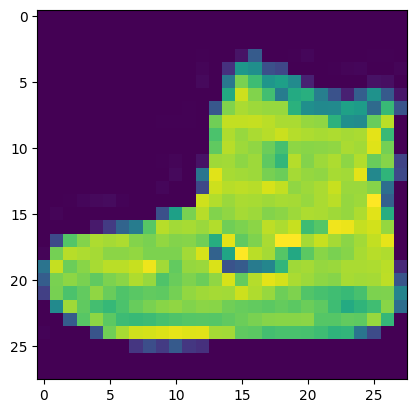

In [8]:
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())

(-0.5, 27.5, 27.5, -0.5)

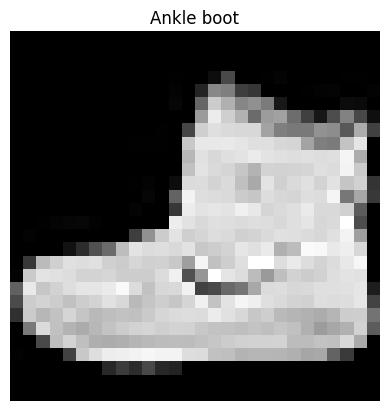

In [9]:
plt.imshow(image.squeeze(),cmap='gray')
plt.title(class_names[label])
plt.axis(False)

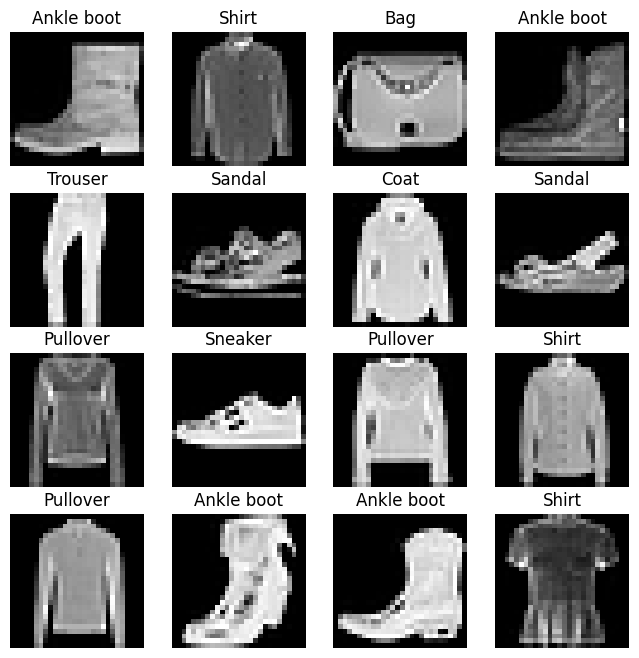

In [10]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(8,8))
rows,cols = 4,4
for i in range(1, rows*cols +1):
  random_idx = torch.randint(0,len(train_data),size=[1]).item()
  img,label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)

## 2. Prepare DataLoader

Right now, the data is in form of PyTorch Datasets.

DataLoader turns our dataset int a Python iterable.

More specifically, we want to turn our data into batches (or mini batches).

Why would we do this?

1. It is more computationally efficient. We break it down to 32 images ar a time (with a size of 32).

2. It gives our neural network more chances to update its gradients per epoch. ( [link](https://www.youtube.com/watch?v=4qJaSmvhxi8))

In [11]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32
train_dataloader = DataLoader( dataset = train_data,
                              batch_size = BATCH_SIZE,
                               shuffle=True)

test_dataloader = DataLoader(dataset = test_data,
                   batch_size = BATCH_SIZE,
                   shuffle = False)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7c51041cbd00>,
 <torch.utils.data.dataloader.DataLoader at 0x7c51041ca500>)

In [12]:
print(f"DataLoaders: {train_dataloader,test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")


DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7c51041cbd00>, <torch.utils.data.dataloader.DataLoader object at 0x7c51041ca500>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [13]:
# Check out what is inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

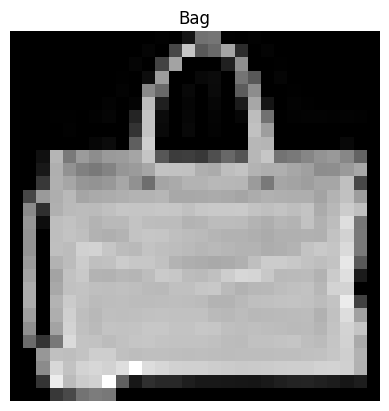

In [14]:
# Show a sample
# torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch),size=[1]).item()
img, label = train_features_batch[random_idx] , train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap='gray')
plt.title(class_names[label])
plt.axis(False)

## 3. Model 0: Build a baseline model

When starting to build a series of ML modelling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try to improve upon subsequent models/experiments.

In other words: start simply and add complexity when necessary.




In [15]:
# Create a flatten layer

flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0] # first batch

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening {x.shape} -> [color_channels,height,width]")
print(f"Shape after flattening {output.shape} -> [color_channels,height*width]")


Shape before flattening torch.Size([1, 28, 28]) -> [color_channels,height,width]
Shape after flattening torch.Size([1, 784]) -> [color_channels,height*width]


In [16]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape, out_features=hidden_units),
        nn.Linear(in_features = hidden_units, out_features=output_shape)
    )
  def forward(self,x):
    return self.layer_stack(x)

In [17]:
# Create instance
torch.manual_seed(42)

#Setup model with input parameters
model_0 = FashionMNISTModelV0(input_shape=28 * 28, # this is 784 (flattening)
                              hidden_units=10,
                              output_shape = len(class_names)
                              ).to("cpu")

In [18]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [19]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

## 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - since we are working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD()` (stohastic gradient descent)
* Evaluation metric -accuracy

In [20]:
import requests
from pathlib import Path

# Download helper functions from the above repo

if Path('helper_function.py').is_file():
  print('helper_function.py already exists')
else:
  print('downloading helper_function.py')
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

downloading helper_function.py


In [21]:
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                             lr = 0.1)

### 3.2 Creating a function to time our experiments

Two of the main things you'll often track:
1. Model's performance
2. How fast it runs

In [22]:
from timeit import default_timer as timer
def print_train_time(start:float,
                     end:float,
                     device:torch.device= None):
  """ Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time


In [23]:
start_time = timer()
end_time = timer()
print_train_time(start=start_time,end=end_time,device='cpu')

Train time on cpu: 0.000 seconds


3.9490000006026094e-05

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through trianing batches, perform training steps, calculate the train loss * per batch *.
3. Loop through testing batches, perform testing steps, calculate the test loss * per batch *.
4. Print out what's happening
5. Time it

In [24]:
# import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (small for faster training time)
epochs = 3

# Create a training and test loop
for epoch in tqdm(range(epochs)): #wrap it with tqdm
  print(f"Epoch: {epoch}\n-----")
  ### Training
  train_loss = 0
  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred,y)
    train_loss += loss # accumulate train loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Print out what's happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss,test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      # 1. Forward pass
      test_pred = model_0(X_test)

      # 2. Caclulate loss (accumulatively)
      test_loss += loss_fn(test_pred,y_test)

      # 3. Calculate accuracy
      test_acc += accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))
    # Calculate the test loss avg per batch
    test_loss /=len(test_dataloader)

    # Calculate the test loss avg per batch
    test_acc /= len(test_dataloader)

    print(f"\n Train loss:{train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc:{test_acc:.4f}")
    train_time_end_on_cpu = timer()
    total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                                end = train_time_end_on_cpu,
                                                device = str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

 Train loss:0.5904 | Test loss: 0.5095, Test acc:82.0387
Train time on cpu: 8.913 seconds
Epoch: 1
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

 Train loss:0.4763 | Test loss: 0.4799, Test acc:83.1969
Train time on cpu: 18.143 seconds
Epoch: 2
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

 Train loss:0.4550 | Test loss: 0.4766, Test acc:83.4265
Train time on cpu: 27.181 seconds


## 4. Make predictions and get Model 0 results

In [43]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn):
  """ Returns a dict containing the results of model predicting on data_loader"""
  loss,acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      # X,y = X.to(device),y.to(device)

      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true = y,
                         y_pred = y_pred.argmax(dim=1))
    # scale loss and acc to find avg per batch

    loss /= len(data_loader)
    acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model is created with class
            "model_loss": loss.item(),
            "model_acc":acc}

model_0_results = eval_model(model = model_0,
                             data_loader=test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn)
model_0_results

RuntimeError: ignored

In [27]:
torch.cuda.is_available()

True

## 5. Setup device agnostic code

In [28]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## 6. Creating a model with non linear functions

In [29]:
# Create a model with non linear and linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape,
                  out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )

  def forward(self,x: torch.Tensor):
    return self.layer_stack(x)


In [31]:
# Create an instance of model_1

torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape = 784, # 28 * 28 image flattened
                              hidden_units= 10,
                              output_shape = len(class_names)).to(device) # send to gpu

next(model_1.parameters())

Parameter containing:
tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
        [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
        [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
        ...,
        [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
        [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
        [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
       device='cuda:0', requires_grad=True)

### 6. Create a loss, optimizer and eval metrics

In [32]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss() # measure how wrong the model is
optimizer = torch.optim.SGD(params = model_1.parameters(), # tries to update the model's parameters to reduce the loss
                             lr = 0.1)


### 6.2 Functionizing training and evaluation/testing loops

* training loop  - `train_step()`
* testing loop  - `test_step()`


In [34]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """ Performs a training with model trying to learn on data_loader"""

  ### Training
  train_loss, train_acc = 0,0

  model.train()

  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(data_loader):

    X,y = X.to(device),y.to(device)
    # 1. Forward pass
    y_pred = model(X)

    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred,y)
    train_loss += loss # accumulate train loss
    train_acc = accuracy_fn(y_true=y,
                            y_pred=y_pred.argmax(dim=1))

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Print out what's happening
    # if batch % 400 == 0:
    #   print(f"Looked at {batch * len(X)}/{len(data_loader.dataset)} samples.")
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")


In [40]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """ Performs a test loop step on model"""
  ### Testing
  test_loss,test_acc = 0,0

  model.eval()
  with torch.inference_mode():
    for X_test,y_test in data_loader:

      X_test,y_test = X_test.to(device),y_test.to(device)

      # 1. Forward pass
      test_pred = model(X_test)

      # 2. Caclulate loss (accumulatively)
      test_loss += loss_fn(test_pred,y_test)

      # 3. Calculate accuracy
      test_acc += accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))
    # Calculate the test loss avg per batch
    test_loss /=len(data_loader)

    # Calculate the test loss avg per batch
    test_acc /= len(data_loader)

    print(f"\n Train loss:{train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc:{test_acc:.4f}")


In [41]:
torch.manual_seed(42)

# measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# set epochs
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n")
  train_step(model=model_1,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn =accuracy_fn,
             device= device )
  test_step(model=model_1,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             accuracy_fn =accuracy_fn,
             device= device )

train_time_end_on_gpu = timer()
total_train_time_model = print_train_time(start=train_time_start_on_cpu,
                                                end = train_time_end_on_cpu,
                                                device = device)



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0

Train loss: 0.80838 | Train acc: 0.04%

 Train loss:0.4550 | Test loss: 0.6786, Test acc:75.6567
Epoch: 1

Train loss: 0.66879 | Train acc: 0.05%

 Train loss:0.4550 | Test loss: 0.6474, Test acc:76.4767
Epoch: 2

Train loss: 0.64107 | Train acc: 0.04%

 Train loss:0.4550 | Test loss: 0.6239, Test acc:77.2633
Train time on cuda: 27.181 seconds


Sometimes, depending on data/ hardware the model might train faster on CPU than GPU.

Why?

1. It could be that the overhead for copying data/model to and from the GPU outweighs the compute benefits by the GPU.

2. The hardware has a better CPU in terms of compute capability than the GPU.